In [4]:
import pandas as pd


# Decesion Tree REgression

In [5]:
from warnings import filterwarnings
filterwarnings("ignore")

# step 1 = data ingestion

In [6]:
df= pd.read_csv('PowerPlant.csv')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [7]:
# 
# Columns description
# AT - Atmospheric Temperature (degree Celsius)
# V - Vaccum pressure inside the boiler Pascals
# AP - Atmospheric Pressure (Pascals)
# RH - Relative Humidity in %
# PE - Power Output of the plant in Mega Watts
# Target Feature is PE - Which is numerical in nature.

# step 2 = data quality check

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [10]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(41)

In [12]:
# drop duplicates
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [13]:
df.duplicated().sum()

np.int64(0)

# Step 3 sep X AND Y

In [15]:
x = df.drop(columns=["PE"])
y = df[["PE"]]

In [16]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [17]:
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [18]:
import seaborn as sns

<Axes: xlabel='PE', ylabel='Count'>

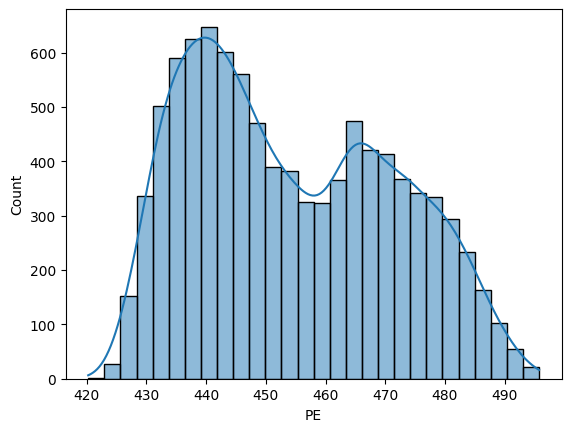

In [19]:
sns.histplot(data=y,x="PE",kde=True)

# step 4 = apply preprocessing

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [26]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [27]:
x_pre = num_pipe.fit_transform(x)
x_pre

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837
...,...,...,...,...
9522,-0.609648,-0.423583,-0.241925,-0.027724
9523,1.847362,1.864831,-0.494441,-0.932100
9524,-0.492776,-0.863450,0.162101,0.364561
9525,-0.269777,0.439598,0.899448,1.459261


# step 5 = Apply train test split

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,test_size=0.2,random_state=42)

In [30]:
xtrain.shape

(7621, 4)

In [31]:
xtest.shape

(1906, 4)

# step 6 = model building

In [33]:
from sklearn.tree import DecisionTreeRegressor


In [34]:
model1 = DecisionTreeRegressor(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="squared_error"
)
model1

DecisionTreeRegressor(max_depth=1, min_samples_leaf=5, min_samples_split=5)

In [35]:
model1.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=5, min_samples_split=5)

In [36]:
model1.score(xtest,ytest)

0.7251450398190283

In [37]:
model1.score(xtrain,ytrain)

0.71765957297802

# to tune the model faster use Randomized search CV

In [ ]:

params = {
    "max_depth": [5, 6, 7, 8, 9, 10, 11, 12, 13],
    "min_samples_split": [5, 6, 7, 8, 9],
    "min_samples_leaf": [5, 6, 7, 8, 9],
    "criterion": ["squared_error", "absolute_error"]
}


In [40]:
params


{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13],
 'min_samples_split': [5, 6, 7, 8, 9],
 'min_samples_leaf': [5, 6, 7, 8, 9],
 'criterion': ['squared_error', 'absolute_error']}

In [41]:
from sklearn.model_selection import RandomizedSearchCV


In [42]:
base_model = DecisionTreeRegressor()

rscv = RandomizedSearchCV(base_model, param_distributions=params, cv=5, scoring="r2", n_jobs=-1)

rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13],
                                        'min_samples_leaf': [5, 6, 7, 8, 9],
                                        'min_samples_split': [5, 6, 7, 8, 9]},
                   scoring='r2')

In [43]:
rscv.score(xtest,ytest)

0.9470390048843815

In [44]:
rscv.score(xtrain,ytrain)

0.9551029309338929

In [45]:
rscv.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 8,
 'max_depth': 8,
 'criterion': 'squared_error'}

In [46]:
best_dtc = rscv.best_estimator_
best_dtc

DecisionTreeRegressor(max_depth=8, min_samples_leaf=8, min_samples_split=6)

# step 7  = model evaluation

In [48]:
best_dtc.score(xtrain, ytrain)



0.9551029309338929

In [49]:
best_dtc.score(xtest, ytest)


0.9470390048843815

In [50]:
from sklearn.metrics import (
    root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
)

In [51]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [52]:
print("Training Results :")
evaluate_model(best_dtc, xtrain, ytrain)

Training Results :
RMSE : 3.59
MAE : 2.69
MAPE : 0.59%
R2 : 95.51%


In [53]:
print("Testing Results :")
evaluate_model(best_dtc, xtest, ytest)

Testing Results :
RMSE : 4.00
MAE : 3.04
MAPE : 0.67%
R2 : 94.70%


# R2 score both in train and test is greater than 0.8 hence it is a good model
# and can use this for out of sample prediction

In [55]:
best_dtc.feature_importances_


array([0.90057508, 0.0845061 , 0.00842379, 0.00649504])

In [56]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [57]:

imp = pd.Series(best_dtc.feature_importances_, index=xtrain.columns)
imp

AT    0.900575
V     0.084506
AP    0.008424
RH    0.006495
dtype: float64

In [58]:
imp.sort_values(ascending=False)


AT    0.900575
V     0.084506
AP    0.008424
RH    0.006495
dtype: float64

<Axes: >

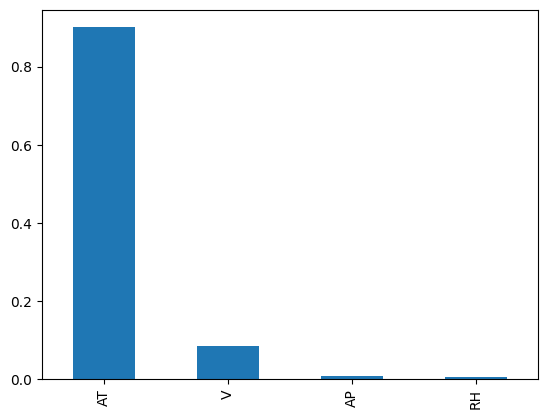

In [59]:
imp.sort_values(ascending=False).plot(kind="bar")


# Step 8 - Perform out of sample prediction


In [61]:
xnew = pd.read_csv("test_PowerPlant.csv")
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [62]:
xnew.shape


(100, 4)

In [63]:
num_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [64]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [65]:
preds = best_dtc.predict(xnew_pre)
preds[0:5]

array([445.13386667, 438.55148936, 432.7625    , 444.33554348,
       465.58888889])

In [66]:
xnew["PE_pred"] = preds


In [67]:
xnew = xnew.round(2)


In [68]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.13
1,28.88,54.89,1007.16,46.60,438.55
2,27.89,73.21,1001.32,85.88,432.76
3,25.69,62.26,1011.38,74.08,444.34
4,12.16,40.81,1025.79,70.97,465.59
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,433.36
96,11.78,39.96,1011.37,82.95,474.91
97,5.62,41.38,1020.91,86.21,484.36
98,24.96,74.99,1008.25,80.52,438.21


In [69]:
xnew.to_csv("Results.csv", index=False)


<Axes: xlabel='PE_pred', ylabel='Count'>

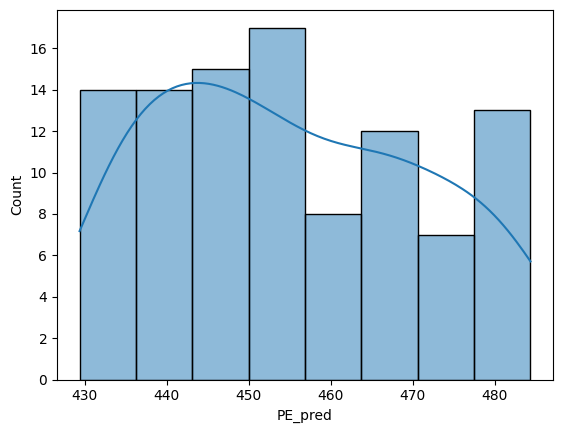

In [70]:
sns.histplot(data=xnew, x="PE_pred", kde=True)


# Step 9 - Save the preprocessor and model object in joblib format


In [72]:
%pip install --upgrade joblib


Note: you may need to restart the kernel to use updated packages.


In [73]:
num_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [74]:
best_dtc


DecisionTreeRegressor(max_depth=8, min_samples_leaf=8, min_samples_split=6)

In [75]:
import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [76]:
joblib.dump(best_dtc, "plant_model.joblib")


['plant_model.joblib']

In [77]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [78]:
m = joblib.load("plant_model.joblib")
m

DecisionTreeRegressor(max_depth=8, min_samples_leaf=8, min_samples_split=6)